# Object Localization

In [1]:
# #Download both images and annotations
# !wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
# !wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [2]:
#Check current directory to make sure data is downloaded
!ls -l

total 3736
-rw-r--r--@     1 oysterable  staff  1622580 Mar 24 22:22 Object_Localization.ipynb
drwxr-xr-x      8 oysterable  staff      256 Jun 30  2012 annotations
-rw-r--r--@     1 oysterable  staff    25969 Mar 24 19:17 cdog.jpg
-rw-r--r--@     1 oysterable  staff     3344 Mar 24 19:17 generate_dataset.py
drwxr-xr-x  11081 oysterable  staff   354592 Mar 24 20:59 images
-rw-r--r--      1 oysterable  staff   198632 Mar 24 21:06 train.csv
-rw-r--r--      1 oysterable  staff    46733 Mar 24 21:06 validation.csv


In [3]:
# #unzip the tar files downloaded abve
# !tar xf images.tar.gz
# !tar xf annotations.tar.gz

# !rm images.tar.gz
# !rm annotations.tar.gz

In [4]:
#Explore directories
!ls -l

total 3736
-rw-r--r--@     1 oysterable  staff  1622580 Mar 24 22:22 Object_Localization.ipynb
drwxr-xr-x      8 oysterable  staff      256 Jun 30  2012 annotations
-rw-r--r--@     1 oysterable  staff    25969 Mar 24 19:17 cdog.jpg
-rw-r--r--@     1 oysterable  staff     3344 Mar 24 19:17 generate_dataset.py
drwxr-xr-x  11081 oysterable  staff   354592 Mar 24 20:59 images
-rw-r--r--      1 oysterable  staff   198632 Mar 24 21:06 train.csv
-rw-r--r--      1 oysterable  staff    46733 Mar 24 21:06 validation.csv


In [5]:
#Check the xml annotations
!ls -l annotations/xmls | wc -l

       1


In [6]:
#Install tidy to review xml files

##option 1
# !sudo apt-get install tidy --quiet

## option 2
# brew update
# brew install tidy-html5


In [7]:
#Check one of the xml file to understand annotations
!tidy -xml -i annotations/xmls/wheaten_terrier_170.xml

Document: "annotations/xmls/wheaten_terrier_170.xml" is not a file!


About HTML Tidy: https://github.com/htacg/tidy-html5
Bug reports and comments: https://github.com/htacg/tidy-html5/issues
Official mailing list: https://lists.w3.org/Archives/Public/public-htacg/
Latest HTML specification: http://dev.w3.org/html5/spec-author-view/
Validate your HTML documents: http://validator.w3.org/nu/
Lobby your company to join the W3C: http://www.w3.org/Consortium

Do you speak a language other than English, or a different variant of 
English? Consider helping us to localize HTML Tidy. For details please see 
https://github.com/htacg/tidy-html5/blob/master/README/LOCALIZE.md


#### Convert XML to CSV

In [8]:
#Move all xml files to images folder, this is needed for python script used next
!mv annotations/xmls/* images/

zsh:1: no matches found: annotations/xmls/*


In [9]:
!ls -l

total 3736
-rw-r--r--@     1 oysterable  staff  1622580 Mar 24 22:22 Object_Localization.ipynb
drwxr-xr-x      8 oysterable  staff      256 Jun 30  2012 annotations
-rw-r--r--@     1 oysterable  staff    25969 Mar 24 19:17 cdog.jpg
-rw-r--r--@     1 oysterable  staff     3344 Mar 24 19:17 generate_dataset.py
drwxr-xr-x  11081 oysterable  staff   354592 Mar 24 20:59 images
-rw-r--r--      1 oysterable  staff   198632 Mar 24 21:06 train.csv
-rw-r--r--      1 oysterable  staff    46733 Mar 24 21:06 validation.csv


In [10]:
#Build csv file for both training and test dataset
!python generate_dataset.py

class british_shorthair: 100 images
class german_shorthaired: 100 images
class english_setter: 100 images
class siamese: 100 images
class pomeranian: 100 images
class newfoundland: 100 images
class saint_bernard: 99 images
class scottish_terrier: 100 images
class basset_hound: 100 images
class birman: 100 images
class shiba_inu: 100 images
class egyptian_mau: 92 images
class ragdoll: 99 images
class american_pit_bull_terrier: 100 images
class boxer: 100 images
class havanese: 100 images
class maine_coon: 100 images
class great_pyrenees: 100 images
class leonberger: 100 images
class english_cocker_spaniel: 100 images
class japanese_chin: 100 images
class staffordshire_bull_terrier: 100 images
class samoyed: 99 images
class bengal: 98 images
class american_bulldog: 100 images
class beagle: 100 images
class miniature_pinscher: 100 images
class bombay: 100 images
class sphynx: 100 images
class abyssinian: 99 images
class keeshond: 100 images
class wheaten_terrier: 100 images
class yorkshir

In [11]:
!ls -l

total 3736
-rw-r--r--@     1 oysterable  staff  1622580 Mar 24 22:22 Object_Localization.ipynb
drwxr-xr-x      8 oysterable  staff      256 Jun 30  2012 annotations
-rw-r--r--@     1 oysterable  staff    25969 Mar 24 19:17 cdog.jpg
-rw-r--r--@     1 oysterable  staff     3344 Mar 24 19:17 generate_dataset.py
drwxr-xr-x  11081 oysterable  staff   354592 Mar 24 20:59 images
-rw-r--r--      1 oysterable  staff   198632 Mar 25 09:45 train.csv
-rw-r--r--      1 oysterable  staff    46733 Mar 25 09:45 validation.csv


#### Visualize Data

In [12]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [13]:
#Read csv file as pandas dataframe, csv file has no header
train_df = pd.read_csv('train.csv', header=None,
                       names=['File', 'Height','Width','xmin',
                              'ymin','xmax', 'ymax','Class','Label'])

In [14]:
print(train_df.shape)
train_df.head()

(2984, 9)


,File,Height,Width,xmin,ymin,xmax,ymax,Class,Label
0,images/British_Shorthair_10.jpg,350,233,83,29,197,142,british_shorthair,0
1,images/British_Shorthair_174.jpg,375,500,134,79,297,234,british_shorthair,0
2,images/British_Shorthair_160.jpg,333,500,165,30,327,187,british_shorthair,0
3,images/British_Shorthair_148.jpg,281,500,205,46,277,115,british_shorthair,0
4,images/British_Shorthair_149.jpg,375,500,119,26,353,217,british_shorthair,0


In [15]:
#Create a dictionary to hold label and corresponding class name
num_classes = train_df['Label'].unique()
label_class_dict = dict(zip(train_df['Label'], train_df['Class']))
#label_class_dict

In [16]:
num_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [17]:
label_class_dict

{0: 'british_shorthair',
 1: 'german_shorthaired',
 2: 'english_setter',
 3: 'siamese',
 4: 'pomeranian',
 5: 'newfoundland',
 6: 'saint_bernard',
 7: 'scottish_terrier',
 8: 'basset_hound',
 9: 'birman',
 10: 'shiba_inu',
 11: 'egyptian_mau',
 12: 'ragdoll',
 13: 'american_pit_bull_terrier',
 14: 'boxer',
 15: 'havanese',
 16: 'maine_coon',
 17: 'great_pyrenees',
 18: 'leonberger',
 19: 'english_cocker_spaniel',
 20: 'japanese_chin',
 21: 'staffordshire_bull_terrier',
 22: 'samoyed',
 23: 'bengal',
 24: 'american_bulldog',
 25: 'beagle',
 26: 'miniature_pinscher',
 27: 'bombay',
 28: 'sphynx',
 29: 'abyssinian',
 30: 'keeshond',
 31: 'wheaten_terrier',
 32: 'yorkshire_terrier',
 33: 'chihuahua',
 34: 'persian',
 35: 'russian_blue',
 36: 'pug'}

Show images with bounding box

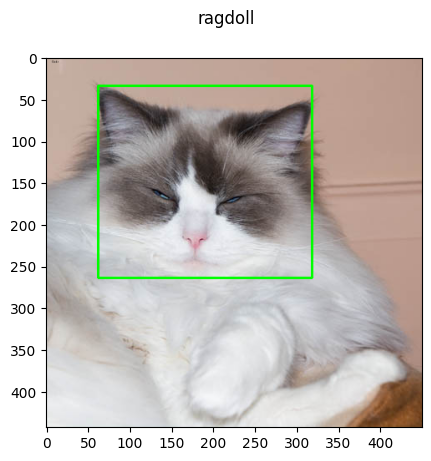

In [18]:
#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])

#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df.loc[img_num,'File'])
cv2.rectangle(img,
             (train_df.loc[img_num, 'xmin'],train_df.loc[img_num, 'ymin']),
             (train_df.loc[img_num, 'xmax'],train_df.loc[img_num, 'ymax']),
             (0,255,0),
             2)
#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [19]:
#Read the validation csv file
test_df = pd.read_csv('validation.csv', header=None,
                       names=['File', 'Height','Width','xmin',
                              'ymin','xmax', 'ymax','Class','Label'])

In [20]:
train_df.shape, test_df.shape

((2984, 9), (702, 9))

#### Build a Batch Generator

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, df, batch_size, img_size, num_classes, shuffle=True):
        self.df = df.reset_index(drop=True)
        self.batch_size = batch_size
        self.img_size = img_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.indices = np.arange(len(self.df))
        self.on_epoch_end()

    def __len__(self):
        return len(self.df) // self.batch_size

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.df.iloc[batch_indices]

        batch_images = np.zeros((self.batch_size, self.img_size, self.img_size, 3), dtype=np.float32)
        batch_labels = np.zeros((self.batch_size, self.num_classes), dtype=np.float32)
        batch_bboxes = np.zeros((self.batch_size, 4), dtype=np.float32)

        for i, (_, row) in enumerate(batch_df.iterrows()):
            # Load image
            img = load_img(row['File'], target_size=(self.img_size, self.img_size))
            img_array = img_to_array(img)
            
            #change this if you use other than the resnet50 model architecture
            batch_images[i] = tf.keras.applications.resnet50.preprocess_input(img_array)

            # One-hot encode label
            label = tf.keras.utils.to_categorical(row['Label'], num_classes=self.num_classes)
            batch_labels[i] = label

            # Rescale bounding boxes
            xmin = row['xmin'] * self.img_size / row['Width']
            xmax = row['xmax'] * self.img_size / row['Width']
            ymin = row['ymin'] * self.img_size / row['Height']
            ymax = row['ymax'] * self.img_size / row['Height']

            batch_bboxes[i] = [
                xmin / self.img_size,
                ymin / self.img_size,
                (xmax - xmin) / self.img_size,
                (ymax - ymin) / self.img_size
            ]

        return batch_images, (batch_labels, batch_bboxes)


2025-03-25 09:45:13.797767: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Setup
img_size = 224  # Depends on the model architecture you are using.
# For example, for resnet50, the model was trained on an image size of 224:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50#:~:text=has%20to%20be-,(224%2C%20224%2C%203),-(with%20%22channels_

batchsize = 64 # depends on the number of images you have for the training dataset, you can divide that by 100 or something like that and that will give you a good batch size. Also keep in mind that the batch size is the number of images the RAM will need to process at the same time, so if your image is 5MB and your batch is 100, then you will need 500MB RAM just for the images, plus remember you need space to save the model weights and all training parameters so, keep that in mind. 


num_classes = len(train_df['Label'].unique())
print("Number of classes: ", num_classes)


#The input data (train_df and test_df) must be in pandas dataframe in order for the data processing and model training to work.

# Create the generators
train_generator = CustomDataGenerator(train_df, batchsize, img_size, num_classes)
test_generator = CustomDataGenerator(test_df, batchsize, img_size, num_classes)

Number of classes:  37


#### Build the Model

Load Pre-Trained Model

In [23]:
tf.keras.backend.clear_session()

#To extract image features
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(img_size,img_size, 3),
                                          weights='imagenet')

Freeze all layers of Pre-trained model

In [24]:
len(model.layers)

175

In [25]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [26]:
for layer in model.layers:
    layer.trainable = False
#for layer in model.layers[150:]:
#    layer.trainable = True

In [27]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [28]:
model.output

<KerasTensor shape=(None, 7, 7, 2048), dtype=float32, sparse=False, name=keras_tensor_174>

Add layers

In [29]:
#get Output layer of Pre-trained model
x = model.output

#Flatten the output to feed to work on the model output
x = tf.keras.layers.Flatten()(x)


## TODO:
## Add convolution layers if the original model was did not include images from your domain industry
## Convolution layers are need it when you need to improve the class accuracy


#Add Dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Play with this part to 
#Add one Dense layer
# x = tf.keras.layers.Dense(2000, activation='relu')(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Batch Norm
x = tf.keras.layers.BatchNormalization()(x)


#

Build layer for Label output

In [30]:
#Classification
label_output = tf.keras.layers.Dense(num_classes,
                                     activation='softmax',
                                     name='class_op')(x)

Build layer for bounding box output

In [31]:
#Regression
bbox_output = tf.keras.layers.Dense(4 ,
                                    activation='sigmoid',
                                    name='reg_op')(x)

Finalize the model

In [ ]:
#Non Sequential model as it has two different outputs
# model.Sequential is good when we need only one output.
# In this case we need multiple outputs, we need the label class and the bounding box
# So we use models.Model
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [33]:
final_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 43,667,353 (166.58 MB)

 Trainable params: 20,079,241 (76.60 MB)

 Non-trainable params: 23,588,112 (89.98 MB)

In [ ]:

final_model.compile(
    optimizer='adam',
    loss={'reg_op': 'mse', 'class_op': 'categorical_crossentropy'},
    loss_weights={'reg_op': 1.0, 'class_op': 7.0},
    metrics={'reg_op': 'mse', 'class_op': 'accuracy'}
)


# Train
final_model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)


Epoch 1/50


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def predict_and_draw(image_path, model, label_map, img_size=224, true_bbox=None, true_label=None):
    """
    Predict the class and bounding box for a given image and visualize it.

    Args:
        image_path (str): Path to the image file.
        model (tf.keras.Model): Trained Keras model with classification and regression heads.
        label_map (dict): Mapping from class index to class name.
        img_size (int): Target input image size.
        true_bbox (tuple or list): Optional actual bounding box (xmin, ymin, xmax, ymax).
        true_label (str): Optional actual label for display.
    """
    # Load original image
    img = tf.keras.preprocessing.image.load_img(image_path)
    w, h = img.size

    # Preprocess
    img_resized = img.resize((img_size, img_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    input_array = np.expand_dims(img_array, axis=0)

    # Predict
    label_pred, bbox_pred = model.predict(input_array)
    label_pred = label_pred[0]
    bbox_pred = bbox_pred[0]

    # Decode predictions
    pred_label = label_map[np.argmax(label_pred)]
    xmin = int(bbox_pred[0] * w)
    ymin = int(bbox_pred[1] * h)
    xmax = int((bbox_pred[0] + bbox_pred[2]) * w)
    ymax = int((bbox_pred[1] + bbox_pred[3]) * h)

    # Load for drawing (OpenCV uses BGR)
    img_cv = cv2.imread(image_path)
    if img_cv is None:
        print("Error loading image:", image_path)
        return

    # Draw predicted box (Green)
    cv2.rectangle(img_cv, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    label_text = f"Pred: {pred_label}"
    if true_label:
        label_text += f" | True: {true_label}"
    cv2.putText(img_cv, label_text, (xmin, ymin - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Draw actual box (Red)
    if true_bbox:
        txmin, tymin, txmax, tymax = true_bbox
        cv2.rectangle(img_cv, (txmin, tymin), (txmax, tymax), (255, 0, 0), 2)

    # Convert BGR to RGB and show
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


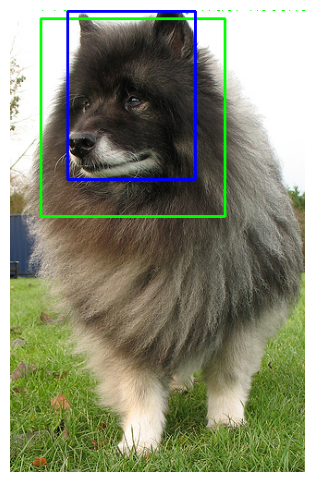

In [ ]:
# Pick a random image from test set
i = np.random.randint(0, len(test_df))
row = test_df.iloc[i]

predict_and_draw(
    image_path=row['File'],
    model=final_model,
    label_map=label_class_dict,   # {label_num: class_name}
    img_size=img_size,
    true_bbox=(row['xmin'], row['ymin'], row['xmax'], row['ymax']),
    true_label=row['Class']
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


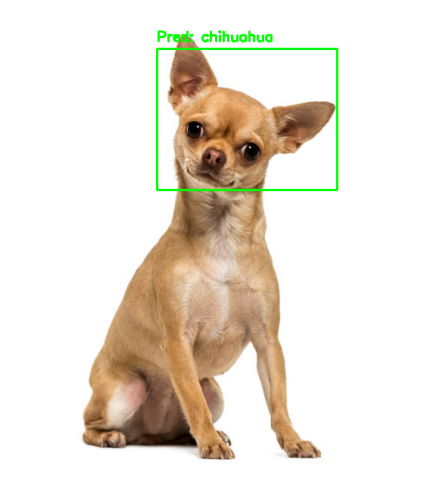

In [ ]:
predict_and_draw(
    image_path='cdog.jpg',
    model=final_model,
    label_map=label_class_dict,
    img_size=img_size
    # Don't pass true_bbox or true_label
)


In [ ]:


# save your model in h5
model.save("custom_resnet50.h5")

## If you dont write an extension then it will create a model tensorflow v2 format model 
# model.save("custom_resnet50")

## You must Install tensorflow in the server you will deploy the model